In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
STAMP=1 ; LAG=8 ; STEP=24
rec_rmse = pd.read_csv('./output/metric/' + f'rmse_stamp{STAMP}_lag{LAG}_step{STEP}.csv')
# rec_rmse.iloc[:,1]


In [3]:
rec_rmse.columns = ['step','RMSE']
rec_rmse['step'] = rec_rmse['step']+1

In [12]:
rec_rmse

,step,RMSE
0,1,4.679271
1,2,6.036604
2,3,7.100224
3,4,8.073945
4,5,8.917471
5,6,9.645483
6,7,10.265279
7,8,10.781107
8,9,11.225933
9,10,11.601309


In [1]:
# plt.figure(figsize=(10,7))
# plt.scatter(rec_rmse['step'], rec_rmse['RMSE'])
# plt.plot(rec_rmse['step'], rec_rmse['RMSE'])
# plt.xlabel('step', fontsize=15)
# plt.ylabel('RMSE', fontsize=15)
# plt.title('RMSE of recursive multi-step forecasting', fontsize=20)

## RMSE, MAPE of different LAGs

In [4]:
def rmse(y_true, y_pred):
    rtn = np.sqrt(  np.average( np.square(y_pred-y_true) ) )
    return  rtn

def mape(y_true,y_pred):
    rtn = np.mean(np.abs((y_true - y_pred) / (1.0+y_true)))
    return rtn

In [5]:
STAMP=1
for l in range(2,26,2):
    output_path=f'./output/predictions/stamp{STAMP}_lag{l}_step1'
    y_gt = pd.read_csv(output_path+'_gt.csv')
    y_pred = pd.read_csv(output_path+'_pred.csv')

    y_gt_arr = np.array(y_gt).reshape(-1)
    y_pred_arr = np.array(y_pred).reshape(-1)

#     print(f'MAPE for single-step forecasting : {round(mape(y_gt_arr, y_pred_arr),4)}')
    print(round(mape(y_gt_arr, y_pred_arr),4))

0.1036
0.1028
0.1015
0.1028
0.1048
0.1069
0.1023
0.105
0.1052
0.1045
0.1061
0.1086


In [6]:
STAMP=1
for l in range(2,26,2):
    output_path=f'./output/predictions/stamp{STAMP}_lag{l}_step1'
    y_gt = pd.read_csv(output_path+'_gt.csv')
    y_pred = pd.read_csv(output_path+'_pred.csv')

    y_gt_arr = np.array(y_gt).reshape(-1)
    y_pred_arr = np.array(y_pred).reshape(-1)

#     print(f'MAPE for single-step forecasting : {round(mape(y_gt_arr, y_pred_arr),4)}')
    print(round(rmse(y_gt_arr, y_pred_arr),4))

4.7093
4.6989
4.6875
4.6793
4.7365
4.7192
4.6961
4.712
4.7578
4.7449
4.763
4.7646


# 예측 결과 시각화

## Single-step Forecast

In [10]:
test_start = datetime(2022,4,1,0,0)
test_end = datetime(2022,4,30,23,0)

test_time_list = []
for i in range(30*24):
    t = test_start + timedelta(hours=i)
#     print(t)
    test_time_list.append(t)

In [11]:
STAMP = 1; LAG = 8
output_path=f'./output/predictions/stamp{STAMP}_lag{LAG}_step1'
y_gt = pd.read_csv(output_path+'_gt.csv')
y_pred = pd.read_csv(output_path+'_pred.csv')

y_gt_arr = np.array(y_gt).reshape(-1)
y_pred_arr = np.array(y_pred).reshape(-1)

len(test_time_list[8:-24])
y_gt['datetime'] = test_time_list[8:-24]
y_pred['datetime'] = test_time_list[8:-24]

Text(0.5, 1.0, 'True vs Prediction plot of location 193')

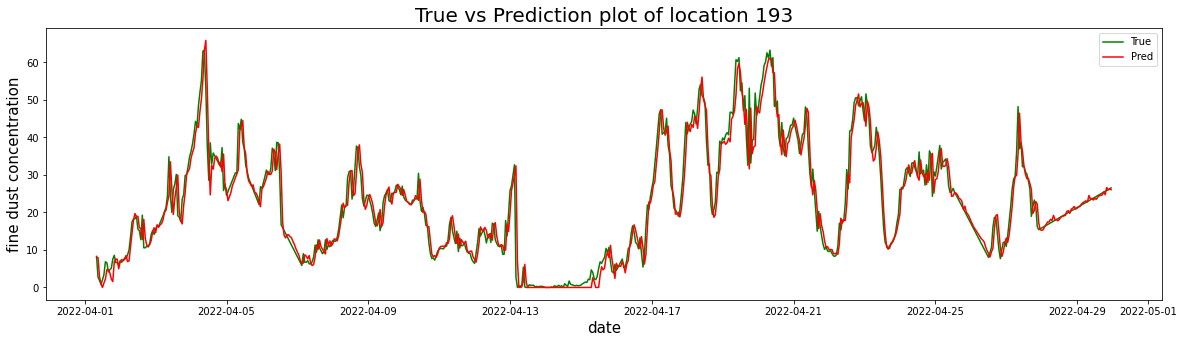

In [14]:
fig, ax = plt.subplots(figsize=(20,5))
sns.lineplot(x='datetime', y='col_193', data=y_gt, ax=ax, color='green', label='True')
sns.lineplot(x='datetime', y='col_193', data=y_pred, ax=ax, color='red', label='Pred')

# ax.set_xticks([0,1,2,3,4,5,6])
# ax.set_xticklabels(['Mon','Tue','Wed','Thur','Fri','Sat','Sun'], fontsize=15)

ax.set_xlabel('date', fontsize=15)
ax.set_ylabel('fine dust concentration', fontsize=15)
ax.set_title('True vs Prediction plot of location 193', fontsize=20)

In [27]:
y_gt_img = y_gt_arr.reshape(len(y_gt),10,20)
y_pred_img = y_pred_arr.reshape(len(y_pred),10,20)

y_gt_img_new = y_gt_img.copy()
y_pred_img_new = y_pred_img.copy()

for i in range(10):
    y_gt_img_new[:,i,:] = y_gt_img[:,9-i,:]
    y_pred_img_new[:,i,:] = y_pred_img[:,9-i,:]

In [24]:
lag = 8
import datetime as dt
idx=3
target = dt.datetime(2022,4,1,0,0) + dt.timedelta(minutes=30*(lag+1+idx))
str(target)

'2022-04-01 06:00:00'

In [46]:
vmax = 50
c = 10

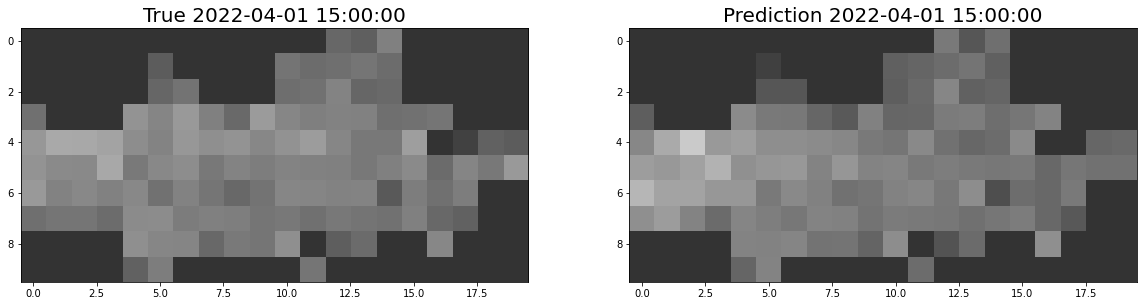

In [47]:
idx=21
target = dt.datetime(2022,4,1,0,0) + dt.timedelta(minutes=30*(lag+1+idx))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,40))

# 2022-04-10 00:00
ax1.imshow(y_gt_img_new[idx][:][:] + c, cmap='gray', vmin=0, vmax=vmax)
ax1.set_title(f'True {target}', fontsize=20)

ax2.imshow(y_pred_img_new[idx][:][:] + c, cmap='gray', vmin=0, vmax=vmax)
ax2.set_title(f'Prediction {target}', fontsize=20)

# plt.tight_layout()
plt.show()

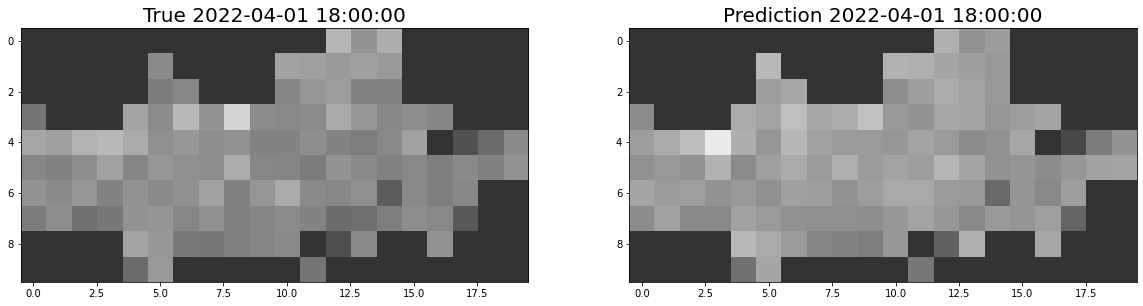

In [48]:
idx = 27
target = dt.datetime(2022,4,1,0,0) + dt.timedelta(minutes=30*(lag+1+idx))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,40))
ax1.imshow(y_gt_img_new[idx][:][:] + c, cmap='gray', vmin=0, vmax=vmax)
ax1.set_title(f'True {target}', fontsize=20)

ax2.imshow(y_pred_img_new[idx][:][:] + c, cmap='gray', vmin=0, vmax=vmax)
ax2.set_title(f'Prediction {target}', fontsize=20)

# plt.tight_layout()
plt.show()

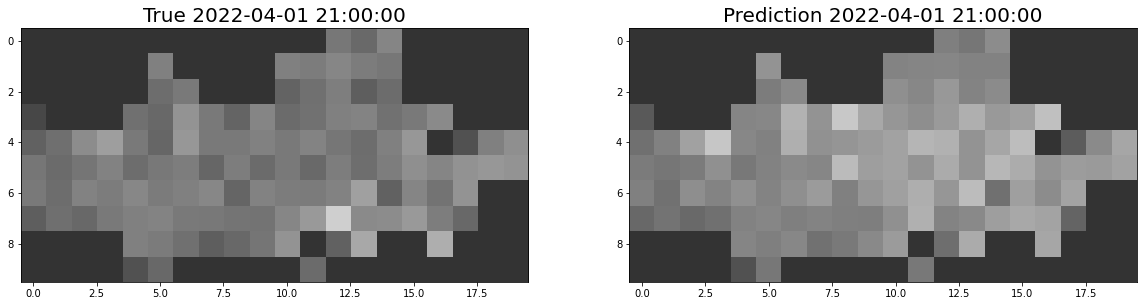

In [49]:
idx = 33
target = dt.datetime(2022,4,1,0,0) + dt.timedelta(minutes=30*(lag+1+idx))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,40))
ax1.imshow(y_gt_img_new[idx][:][:] + c, cmap='gray', vmin=0, vmax=vmax)
ax1.set_title(f'True {target}', fontsize=20)

ax2.imshow(y_pred_img_new[idx][:][:] + c, cmap='gray', vmin=0, vmax=vmax)
ax2.set_title(f'Prediction {target}', fontsize=20)

# plt.tight_layout()
plt.show()

## Multi-step Forecast

In [5]:
table_rec = pd.read_csv('rmse_table_recursive.csv') 
table_dir = pd.read_csv('rmse_table_direct.csv') 

In [8]:
table_rec2 = table_rec.T
table_rec2 = table_rec2.iloc[3:,:]
table_rec2.columns = [1,2,3,4,6,8,12,24]
table_rec2.index = range(2,26,2)
print(round(table_rec2.min(axis=0), 3))

1     14.296
2     12.720
3     12.734
4     12.812
6     13.209
8     13.483
12    13.807
24    15.087
dtype: float64


In [10]:
table_dir2 = table_dir.T
table_dir2 = table_dir2.iloc[3:,:]
table_dir2.columns = [1,2,3,4,6,8,12,24]
table_dir2.index = range(2,26,2)
print(round(table_dir2.min(axis=0), 3))

1     15.546
2     13.294
3     12.131
4     11.898
6     11.751
8     12.272
12    13.702
24    15.475
dtype: float64


In [9]:
round(table_rec2,3)

,1,2,3,4,6,8,12,24
2,15.354,12.720,13.101,12.922,13.209,13.483,13.807,15.087
4,14.758,13.856,13.505,13.372,13.671,14.919,14.348,15.886
6,14.706,13.618,14.079,14.218,14.022,13.485,15.864,16.904
8,14.296,13.910,12.734,14.364,13.783,13.582,14.577,16.344
10,15.193,15.011,14.357,14.519,14.145,14.130,14.985,20.231
12,15.482,15.552,14.637,13.511,14.199,14.412,15.549,17.150
14,15.155,15.930,14.531,15.121,14.525,14.544,16.469,18.271
16,14.865,14.023,14.310,14.131,14.760,14.199,17.107,22.406
18,16.421,15.016,14.299,12.812,14.660,13.996,15.900,22.192
20,16.192,14.197,15.074,14.900,14.514,16.745,17.928,18.604


In [11]:
round(table_dir2,3)

,1,2,3,4,6,8,12,24
2,15.546,13.510,12.420,11.898,11.867,12.272,13.793,15.475
4,16.572,13.557,12.339,12.244,12.066,12.776,13.702,16.440
6,16.786,13.858,12.708,12.659,12.067,12.770,14.324,15.911
8,16.638,14.048,12.812,12.227,11.751,12.746,13.778,16.649
10,16.223,14.237,12.569,12.101,11.965,13.583,14.088,17.586
12,16.104,14.765,12.500,12.030,11.776,12.547,14.429,18.449
14,15.849,14.026,12.131,12.500,11.794,13.125,14.971,21.064
16,15.662,14.161,12.971,11.927,12.233,12.916,15.698,19.868
18,16.400,13.294,12.337,12.657,12.418,14.095,14.880,21.150
20,15.789,13.833,12.364,12.940,12.761,13.459,16.349,18.085


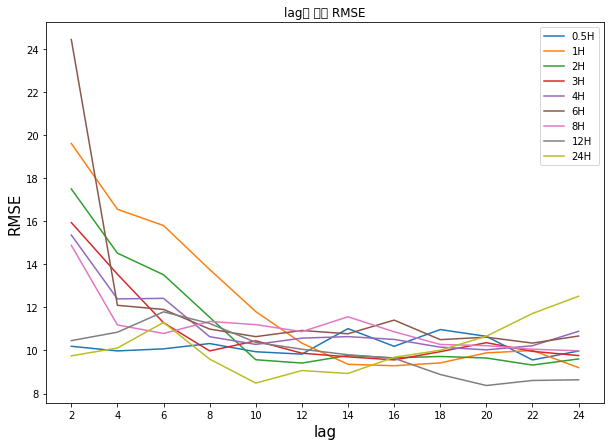

In [49]:
# x_range = range(2,26,2) 
# plt.figure(figsize=(10,7))
# plt.plot(x_range, table2['time_stamp_1'], label='0.5H')
# plt.plot(x_range, table2['time_stamp_2'], label='1H')
# plt.plot(x_range, table2['time_stamp_4'], label='2H')
# plt.plot(x_range, table2['time_stamp_6'], label='3H')
# plt.plot(x_range, table2['time_stamp_8'], label='4H')
# plt.plot(x_range, table2['time_stamp_12'], label='6H')
# plt.plot(x_range, table2['time_stamp_16'], label='8H')
# plt.plot(x_range, table2['time_stamp_24'], label='12H')
# plt.plot(x_range, table2['time_stamp_48'], label='24H')
# plt.xticks(x_range)
# plt.xlabel('lag', fontsize=15)
# plt.ylabel('RMSE', fontsize=15)
# plt.title('lag에 따른 RMSE')
# plt.legend()
# plt.show()